## Projeto de Disciplina - Validação de modelos de clusterização [25E4_3]
### Aluna: Rosana Ribeiro Lima

O código e demais artefatos deste projeto se encontram disponibilizados em https://github.com/roriblim/PD-validacao-clusterizacao

Além disso, o resultado das músicas clusterizadas de forma interativa pode ser visualizado em: https://roriblim.github.io/PD-validacao-clusterizacao/src/tsne_clusters.html

Destaque-se ainda que o t-SNE **não** foi utilizado em nenhuma etapa prévia ou concomitante à clusterização, e sim apenas foi utilizado ao final de todo o processo, para facilitar a visualização. 

### Parte 1 - Infraestrutura

O projeto foi desenvolvido dentro de um ambiente virtual Python 3.12, criado por meio do Anaconda versão 25.5.1. As bibliotecas e dependências encontram-se no requirements.txt, que foi criado a partir do requirements.in. Mais detalhes sobre a configuração feita e sobre como o ambiente foi montado encontram-se no README do projeto Github mencionado acima.

- Captura de tela do ambiente rodando na minha máquina:

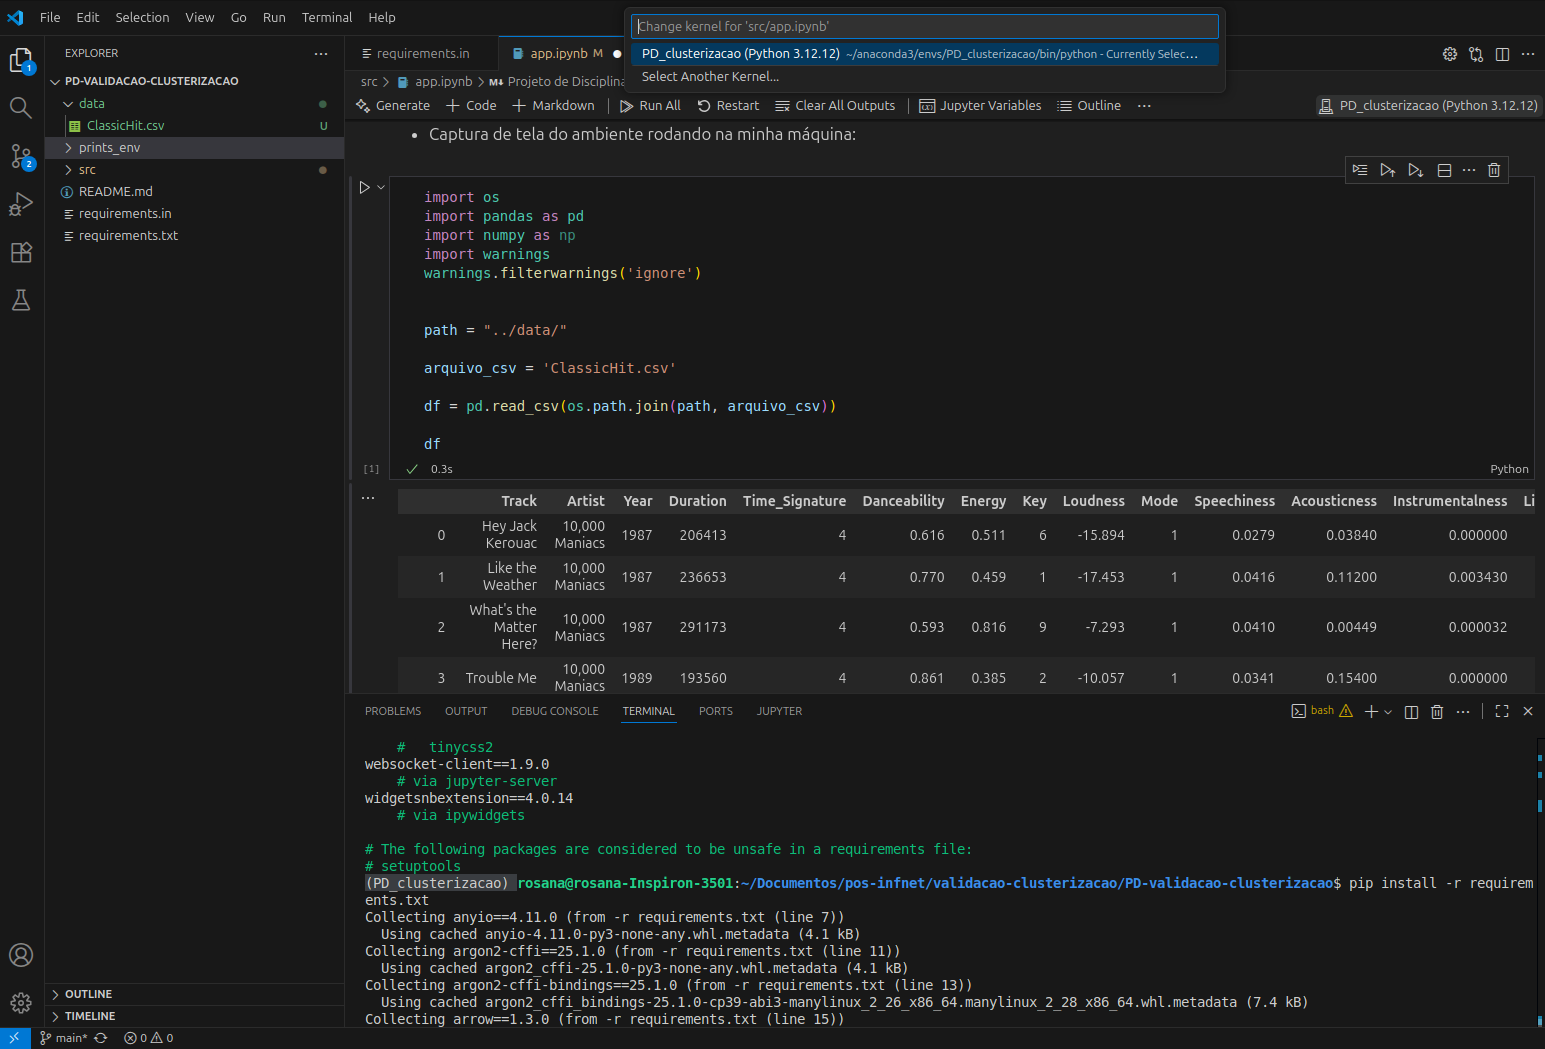

### Parte 2 - Base de dados

#### 2.1 Escolha da base de dados

A base escolhida é uma base do Kaggle com dados técnicos de cerca de 15000 músicas do Spotify: https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023

In [210]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


path = "../data/"

arquivo_csv = 'ClassicHit.csv'

df = pd.read_csv(os.path.join(path, arquivo_csv))

df

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,7 Seconds (feat. Neneh Cherry),Youssou N'Dour,1994,306226,4,0.679,0.659,1,-10.826,0,0.0269,0.07710,0.000004,0.3160,0.528,154.171,47,World
15146,Birima,Youssou N'Dour,1995,228373,4,0.692,0.737,10,-7.042,1,0.0512,0.25400,0.017400,0.1120,0.808,105.754,18,World
15147,Set,Youssou N'Dour,2004,226826,4,0.733,0.730,0,-11.056,1,0.0479,0.04240,0.000101,0.0282,0.840,146.213,25,World
15148,Africa Remembers,Youssou N'Dour,2007,560466,4,0.696,0.378,5,-16.181,0,0.0797,0.44400,0.019400,0.0850,0.551,97.677,8,World


#### 2.2 Justificativa para a escolha: Motivação e Objetivos

A base de dados escolhida para realizar este trabalho é uma base com dados técnicos de cerca de 15000 músicas do Spotify. 
Para a escolha da base foram levados em consideração três fatores:

1 - Potencial de gerar resultados de clusterização com valor prático. No caso, por meio da clusterização das músicas, é possível por exemplo: identificar perfis musicais de usuáruis, encontrar músicas semelhantes ou do mesmo cluster de uma música específica, além de possivelmente criar playlists de forma automática;

2 - Dados com alta qualidade técnica. Na base escolhida, tem-se uma quantidade considerável de dados (15000 músicas), e para cada uma tem-se dados numéricos contínuos úteis para a clusterização, como: energia, instrumentabilidade, dançabilidade, valência, volume, entre outros. Essas variáveis têm natureza quantitativa e comparável, o que é especialmente adequado para algoritmos de clusterização como K-means, DBSCAN, e clustering hierárquico. Além disso, o fato de serem características técnicas — e não meramente categóricas ou subjetivas — reduz ruído e aumenta a robustez dos agrupamentos.

3 - Complexidade adequada. A combinação entre o número de entradas no dataset e a variedade de atributos permite explorar decisões importantes em clusterização, como: normalização, seleção e interpretação de variáveis, ajuste de hiperparâmetros (exemplo: eps e min_samples no DBSCAN), e comparação entre diferentes algoritmos.



#### 2.3 Faixa dinâmica das variáveis e análise do que deve ser feito

O tratamento inicial dos dados para poder visualizar a faixa dinâmica das variáveis consistirá das seguintes etapas:

2.3.1 - **análise do dataset, quantidade e tipos das variáveis**;

2.3.2 - **remoção de dados nulos e/ou repetidos, se houver**;

2.3.3 - **escolha das variáveis para a clusterização (análise de correlação)**;

2.3.4 - **plot da distribuição de cada variável a ser utilizada na clusterização (por meio de boxplot e histograma contínuo)**.

Cada uma deles será abordado de forma mais detalhada a seguir.


##### 2.3.1 Análise do dataset, quantidade e tipos das variáveis

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

In [212]:
df.shape

(15150, 18)

In [213]:
df.describe()

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,15150.000000,1.515000e+04,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000
mean,1984.709769,2.413028e+05,3.921650,0.574667,0.617691,5.257624,-9.154545,0.696634,0.075791,0.302651,0.091046,0.200062,0.571146,120.664078,43.025809
std,19.482460,1.057966e+05,0.348322,0.166208,0.239527,3.569713,4.289558,0.459727,0.077704,0.317793,0.229075,0.175196,0.250969,29.181107,20.788038
min,1899.000000,2.300000e+04,0.000000,0.000000,0.000098,0.000000,-47.359000,0.000000,0.000000,0.000001,0.000000,0.012400,0.000000,0.000000,0.000000
25%,1971.000000,1.803700e+05,4.000000,0.461000,0.442000,2.000000,-11.736750,0.000000,0.034325,0.024225,0.000000,0.091900,0.371000,98.672500,28.000000
50%,1983.000000,2.228525e+05,4.000000,0.582000,0.644000,5.000000,-8.480500,1.000000,0.046400,0.167000,0.000084,0.130000,0.586000,118.777000,44.000000
75%,1998.000000,2.751530e+05,4.000000,0.696000,0.819000,8.000000,-5.955500,1.000000,0.078400,0.557000,0.012400,0.257000,0.782000,138.073250,59.000000
max,2024.000000,3.060650e+06,5.000000,0.988000,0.999000,11.000000,0.919000,1.000000,0.950000,0.996000,0.987000,0.996000,0.989000,219.973000,98.000000


In [214]:
df[df.duplicated(keep=False)]

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
3639,Happy Now,Zedd,2019,207029,3,0.503,0.741,4,-5.128,1,0.047,0.579,0.000001,0.0712,0.458,88.335,63,EDM
3640,Happy Now,Zedd,2019,207029,3,0.503,0.741,4,-5.128,1,0.047,0.579,0.000001,0.0712,0.458,88.335,63,EDM


##### 2.3.2 Remoção de dados nulos e/ou repetidos

Como foi possível verificar na análise do item 2.3.1, não há itens nulos no dataset (o df.info() mostrou que tem-se 15150 dados no total, que bate exatamente com a contagem de dados não-nulos de cada atributo).

No entanto, ainda conforme o item 2.3.1, foi possível identificar um dado duplicado, correspondente aos ids 3639 e 3640. Assim, apenas uma dessas duplicatas deve ser mantida:

In [215]:
df = df.drop_duplicates()
df.shape

(15149, 18)

Agora, se verificarmos novamente se há dados duplicados, não encontraremos:

In [216]:
df[df.duplicated(keep=False)]

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre


##### 2.3.3 Escolha das variáveis para a clusterização

De início, já vamos descartar algumas variáveis que não serão interessantes para a análise:

- Track, Artist, Genre: pois queremos variáveis com dados numéricos para a análise.
- Year, Popularity: pois queremos dados mais técnicos referentes à musicalidade em si.
- Mode, Key, Time_Signature, Duration: dados que não interferem tanto no gosto musical. No caso do "Mode", o Modo maior tende a soar mais feliz, mas a Valência já captura esse dado de forma mais precisa.

In [217]:
df_clust = df.drop(columns=['Track', 'Artist', 'Genre', 'Year', 'Popularity', 'Mode', 'Key', 'Time_Signature', 'Duration'])
df_clust

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.616,0.511,-15.894,0.0279,0.03840,0.000000,0.1500,0.604,132.015
1,0.770,0.459,-17.453,0.0416,0.11200,0.003430,0.1450,0.963,133.351
2,0.593,0.816,-7.293,0.0410,0.00449,0.000032,0.0896,0.519,99.978
3,0.861,0.385,-10.057,0.0341,0.15400,0.000000,0.1230,0.494,117.913
4,0.622,0.876,-6.310,0.0305,0.01930,0.006840,0.0987,0.867,104.970
...,...,...,...,...,...,...,...,...,...
15145,0.679,0.659,-10.826,0.0269,0.07710,0.000004,0.3160,0.528,154.171
15146,0.692,0.737,-7.042,0.0512,0.25400,0.017400,0.1120,0.808,105.754
15147,0.733,0.730,-11.056,0.0479,0.04240,0.000101,0.0282,0.840,146.213
15148,0.696,0.378,-16.181,0.0797,0.44400,0.019400,0.0850,0.551,97.677


Agora, podemos procurar identificar, dentre as variáveis restantes, se existem variáveis altamente correlacionadas (nesse caso, poderíamos utilizar apenas uma delas):

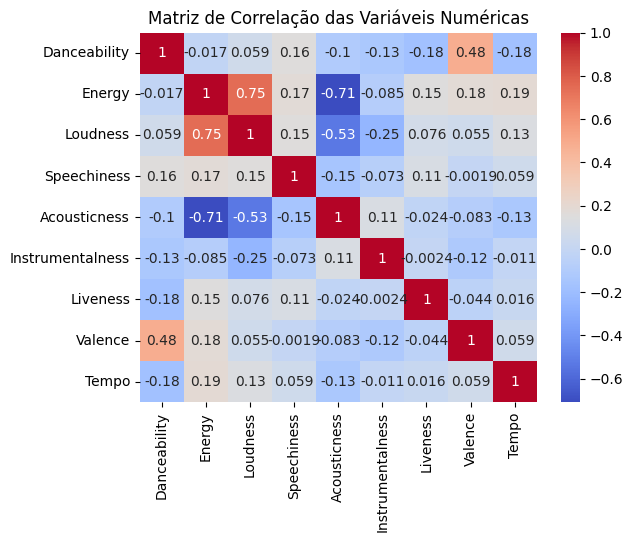


Pares com alta correlação (|corr| >= 0.7):


,Variavel_1,Variavel_2,Correlacao
8,Energy,Loudness,0.745855
10,Energy,Acousticness,-0.708695


In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlação
corr = df_clust.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

# Encontrar pares altamente correlacionados
# threshold: |correlação| >= 0.7
threshold = 0.7

corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) 
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Variavel_1', 'Variavel_2', 'Correlacao']

high_corr = corr_pairs[abs(corr_pairs['Correlacao']) >= threshold]
print("\nPares com alta correlação (|corr| >= 0.7):")
display(high_corr)


Analisando os dados, é possível observar que os dados em geral apresentam informações significativas, sem muita correlação. Todavia, uma alta correlação pôde ser observada em alguns pares de dados, a saber: Energia e Loudness (Volume / Intensidade Sonora); Energia e Acusticidade. Apesar de alta, essa correlação ainda é abaixo de 80%, então se descartada alguma dessas colunas, corre-se o risco de perder dados importantes e significativos. 

Então serão mantidas essas colunas:



In [219]:
clust_cols = df_clust.columns
clust_cols

Index(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
      dtype='object')

##### 2.3.4 Plot de distribuição das variáveis - faixa dinâmica

Agora vamos então plotar a distribuição dessas variáveis:

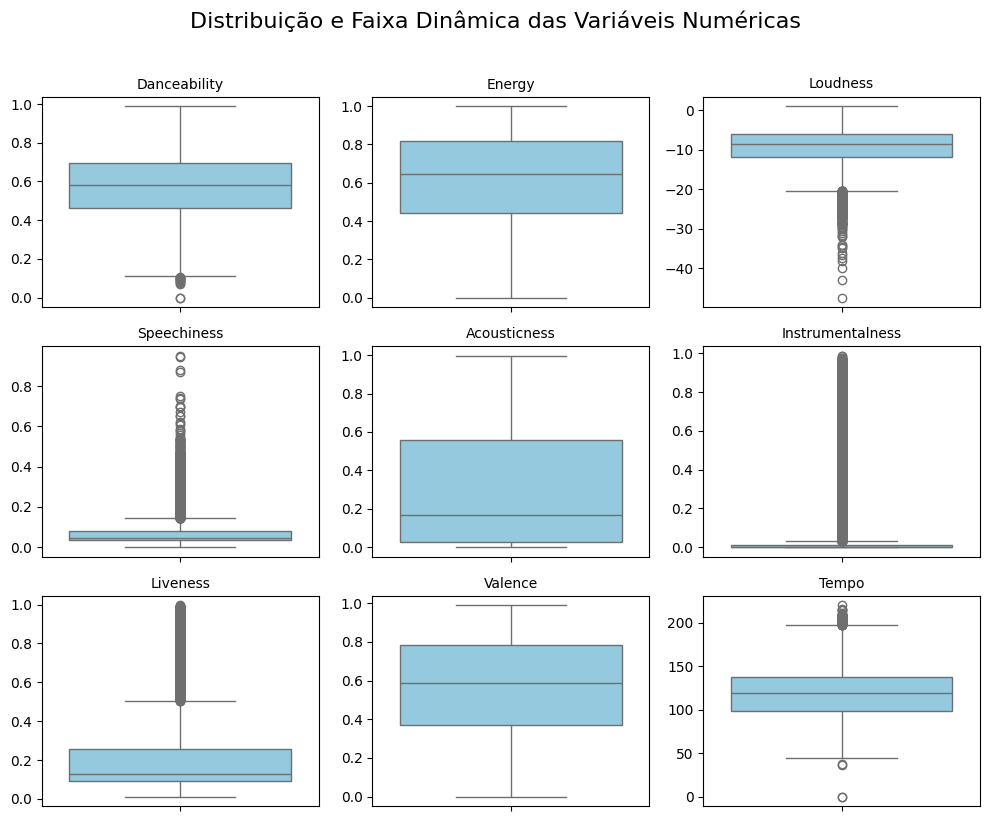

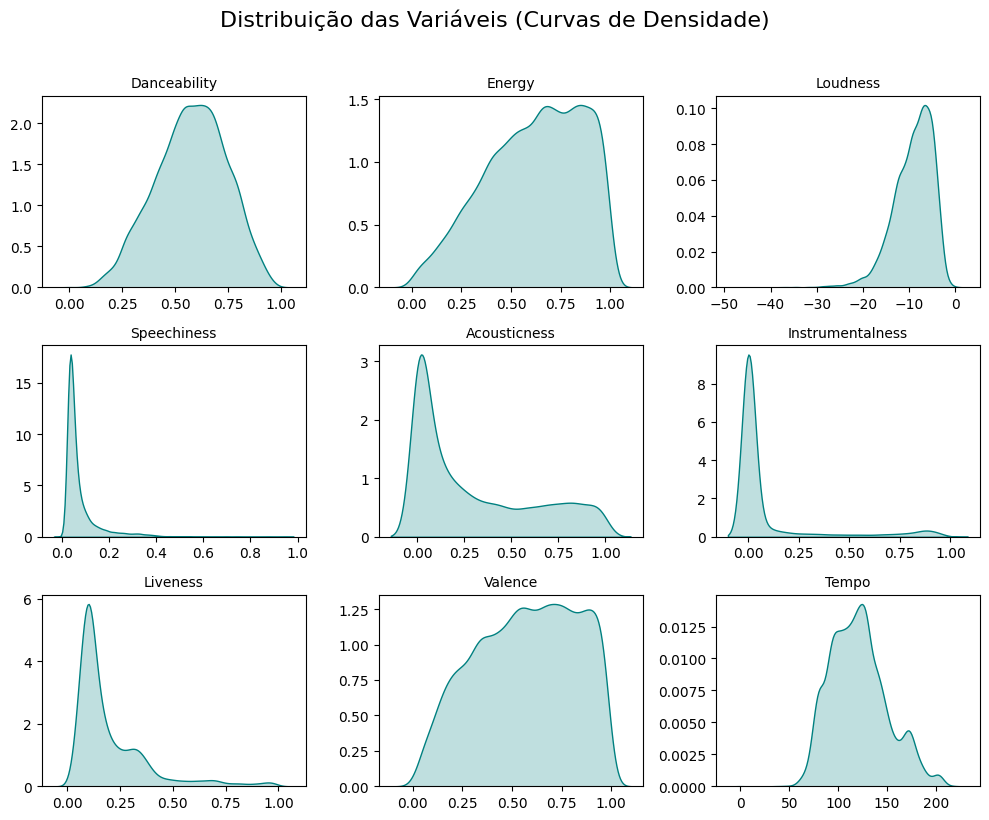

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- BOXPLOTS (verticais em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição e Faixa Dinâmica das Variáveis Numéricas", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.boxplot(y=df_clust[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis (Curvas de Densidade)", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.kdeplot(df_clust[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

#### 2.4 Pré-processamento dos dados

Observa-se que muitas dessas variáveis possuem dados bem distribuídos ao longo de sua faixa. Ainda assim, nota-se uma presença significativa de outliers em atributos como Instrumentalness, Speechiness, Loudness e Liveness. No caso, não queremos descartar nenhum outlier, pois nesse dataset em questão, os dados que aparentam ser outliers também contém informações importantes sobre as músicas. Então não serão removidos os dados com outliers.

Porém, os dados não estão em uma mesma escala. Ainda precisamos deixar os dados na mesma escala antes de usá-los como entrada na clusterização, a fim de ter resultados mais confiáveis. Então vamos precisar utilizar o StandardScaler para escalonar os dados sem perder as informações dos outliers.



##### Escalonamento dos dados

In [221]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_scaled = df_clust.copy()
df_scaled[clust_cols] = scaler.fit_transform(df[clust_cols])

df_scaled

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.248656,-0.445394,-1.571114,-0.616348,-0.831481,-0.397481,-0.285804,0.130880,0.388925
1,1.175210,-0.662491,-1.934565,-0.440037,-0.599878,-0.382507,-0.314344,1.561344,0.434709
2,0.110275,0.827959,0.434046,-0.447759,-0.938188,-0.397342,-0.630567,-0.207809,-0.708988
3,1.722718,-0.971435,-0.210328,-0.536558,-0.467713,-0.397481,-0.439920,-0.307424,-0.094353
4,0.284756,1.078454,0.663214,-0.582888,-0.891584,-0.367621,-0.578624,1.178824,-0.537911
...,...,...,...,...,...,...,...,...,...
15145,0.627701,0.172495,-0.389606,-0.629218,-0.709700,-0.397463,0.661723,-0.171948,1.148214
15146,0.705916,0.498139,0.492562,-0.316491,-0.153035,-0.321523,-0.502708,0.943734,-0.511044
15147,0.952596,0.468915,-0.443226,-0.358960,-0.818893,-0.397040,-0.981038,1.071240,0.875492
15148,0.729983,-1.000660,-1.638023,0.050287,0.444853,-0.312792,-0.656823,-0.080303,-0.787843


A nova distribuição após o escalonamento dos dados então fica assim:

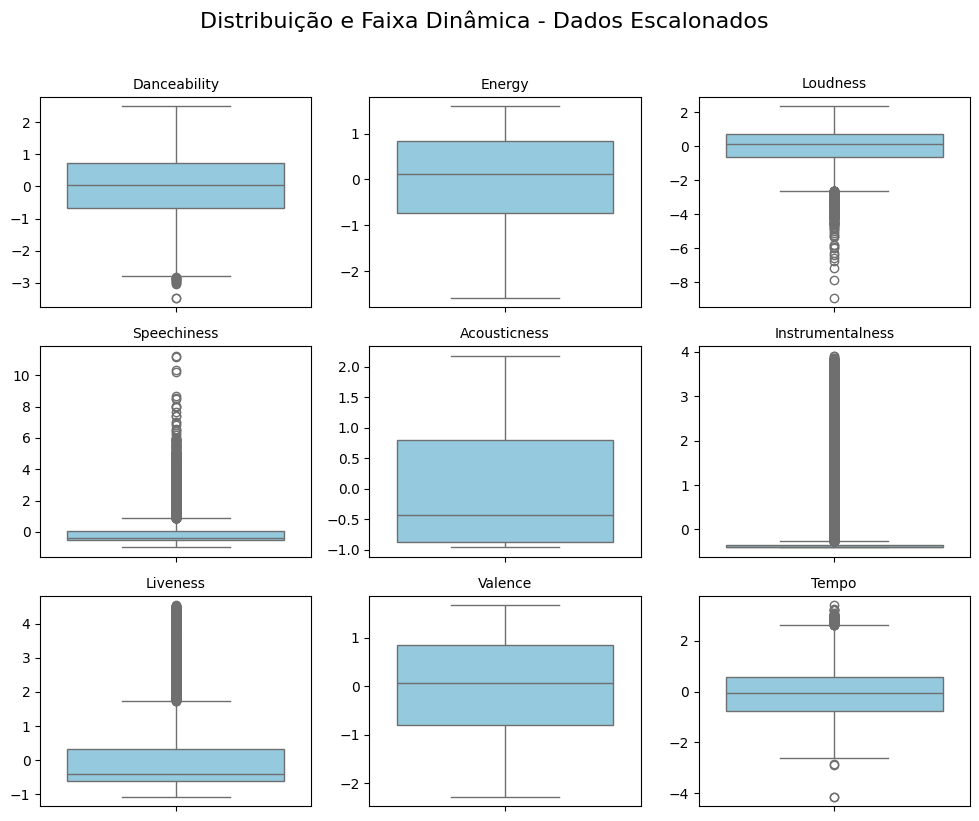

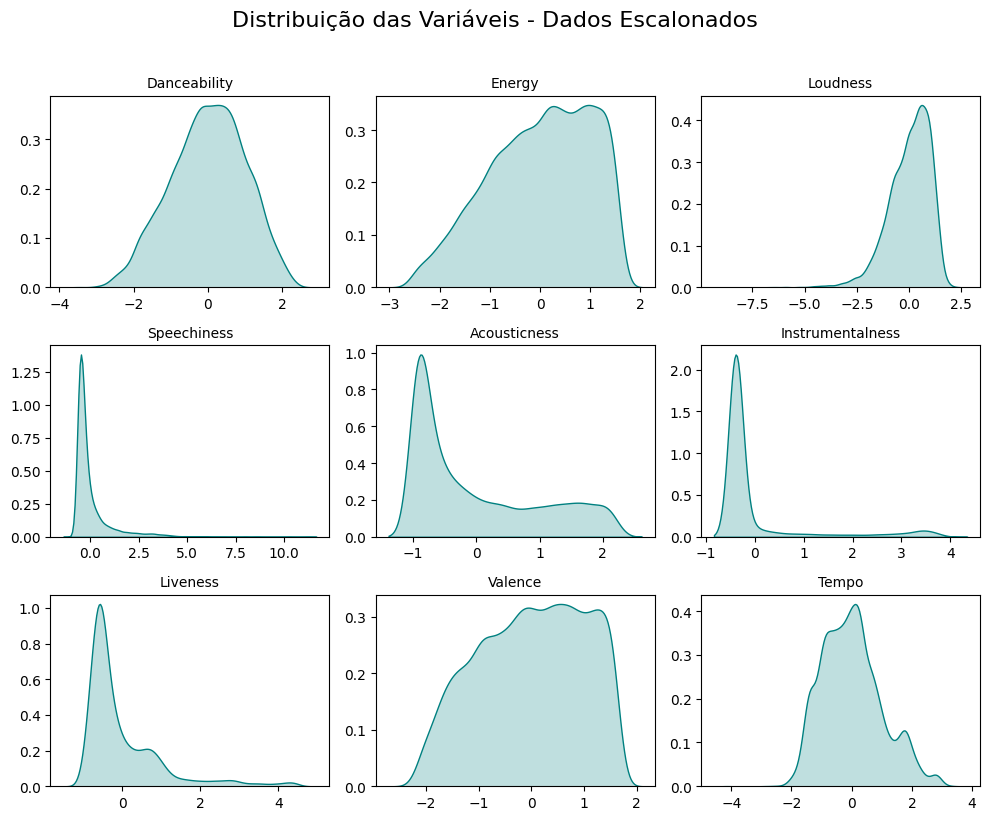

In [222]:
# --- BOXPLOTS (verticais em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição e Faixa Dinâmica - Dados Escalonados", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.boxplot(y=df_scaled[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis - Dados Escalonados", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.kdeplot(df_scaled[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

### Parte 3 - Clusterização

#### 3.1 Encontrando número adequado de clusters com Índice de Silhueta

##### 3.1.a) K-Médias

A fim de encontrar o número adequado de clusters para o K-Médias usando como referência o Índice de Silhueta, primeiro vamos analisar o intervalo de possibilidades em questão. Para isso, vamos analisar a quantidade de dados que temos, a quantidade de atributos e ainda a quantidade de gêneros musicais em questão:

In [223]:
print(df['Genre'].value_counts())
print(f"\nNúmero de gêneros musicais distintos: {df['Genre'].nunique()}")
print(f"Número de amostras: {df.shape[0]}")
print(f"Número de atributos: {df_scaled.shape[1]}")


Genre
Pop          3669
Metal         922
Country       833
R&B           822
Rock          799
Alt. Rock     780
Jazz          778
Punk          754
Rap           718
EDM           699
Blues         683
Disco         652
Today         620
Folk          575
Reggae        439
Funk          388
SKA           381
World         326
Gospel        311
Name: count, dtype: int64

Número de gêneros musicais distintos: 19
Número de amostras: 15149
Número de atributos: 9


Para a clusterização então, estamos lidando com 19 gêneros musicais distintos, representados por 15149 músicas, cada qual com 9 atributos. No caso, possivelmente teremos então uma quantidade grande de clusters. Como estamos lidando com 19 gêneros musicais, podemos considerar aceitável um intervalo que contenha esse valor:

In [224]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters_per_k = [
    KMeans(n_clusters=k, random_state=42).fit(df_scaled) for k in range(3,30)
]

silhouette_score_list = [
    silhouette_score(df_scaled, cluster_model.labels_) for cluster_model in clusters_per_k
]

max_silhouette_score = max(silhouette_score_list)
best_k = silhouette_score_list.index(max_silhouette_score)+3  # +3 porque o range começa em 3, mas o índice começa em 0

print(f"Melhor k: {best_k} com Silhouette Score: {max_silhouette_score:.4f}")


Melhor k: 6 com Silhouette Score: 0.1925


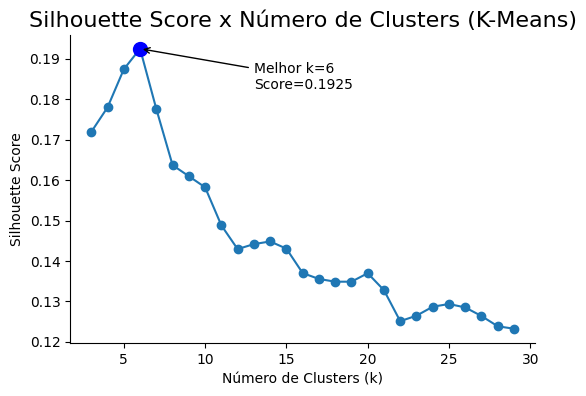

In [225]:
f, ax = plt.subplots(figsize=(6, 4))

ax.plot(range(3,30), silhouette_score_list, marker='o')

ax.set_xlabel('Número de Clusters (k)')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score x Número de Clusters (K-Means)', fontsize=16)
ax.plot(best_k, max_silhouette_score, marker='o', markersize=10, color='blue')
ax.annotate(f'Melhor k={best_k}\nScore={max_silhouette_score:.4f}', 
            xy=(best_k, max_silhouette_score), 
            xytext=(best_k+7, max_silhouette_score-0.01),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10)
sns.despine()
plt.show()

Portanto, para o K-Means, foi encontrado o k = 6 como k ideal utilizando como base o Índice de Silhueta.
Se fizermos a clusterização, teremos então:

In [226]:
kmeans_best_silhuette = KMeans(n_clusters=6, random_state=42).fit(df_scaled)
labels_kmeans_best_silhuette = kmeans_best_silhuette.labels_

Vamos ainda plotar o gráfico de Silhueta para esse caso:

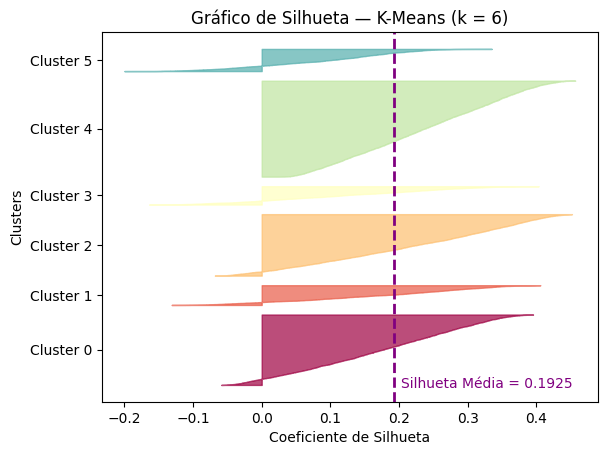

In [250]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

k = 6
silhouette_coefficients = silhouette_samples(df_scaled, labels_kmeans_best_silhuette)
padding = len(df_scaled) // 30
pos = padding
ticks = []
for i in range(k):
    sample_silhouette_values = silhouette_coefficients[labels_kmeans_best_silhuette == i]
    sample_silhouette_values.sort()

    color = mpl.cm.Spectral(i / k)

    plt.fill_betweenx(
        np.arange(pos, pos + len(sample_silhouette_values)),
        0,
        sample_silhouette_values,
        alpha=0.7,
        facecolor=color,
        edgecolor=color
    )
    ticks.append(pos + len(sample_silhouette_values) // 2)
    pos += len(sample_silhouette_values) + padding

# ---- eixo Y (clusters) ----
plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter([f"Cluster {i}" for i in range(k)]))

# ---- linha da silhueta média ----
sil_avg = silhouette_score(df_scaled, labels_kmeans_best_silhuette)
plt.axvline(x=sil_avg, color='purple', linestyle='--', linewidth=2)
plt.text(sil_avg + 0.01, pos * 0.02, f"Silhueta Média = {sil_avg:.4f}", color="purple")

# ---- labels e título ----
plt.xlabel("Coeficiente de Silhueta")
plt.ylabel("Clusters")
plt.title(f"Gráfico de Silhueta — K-Means (k = {k})")
plt.grid(False)

plt.show()

Por fim, vamos analisar rapidamente os resultados para verificar as características de cada Cluster encontrado. Para isso, vamos plotar os centroides e pegar uma música representativa de cada Cluster por meio do ponto mais próximo a esse centroide:

In [255]:
df_com_clusters = df_scaled.copy()
df_com_clusters['cluster_kmeans_best_silhuette'] = labels_kmeans_best_silhuette

cluster_means__kmeans_best_silhuette = df_com_clusters.groupby('cluster_kmeans_best_silhuette').mean(numeric_only=True)

print("\nCentroides de cada cluster (K-Means com melhor Silhueta):")
cluster_means__kmeans_best_silhuette



Centroides de cada cluster (K-Means com melhor Silhueta):


,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
cluster_kmeans_best_silhuette,,,,,,,,,
0,-0.705111,0.790921,0.687355,-0.096176,-0.712973,-0.204828,-0.084817,-0.546664,0.452563
1,0.796848,0.186364,0.357023,2.970017,-0.368823,-0.334260,0.022242,0.032659,-0.066660
2,-0.352490,-1.227948,-0.844434,-0.415552,1.207023,-0.289447,-0.233192,-0.492965,-0.238925
3,-0.402952,0.380465,0.200856,0.120950,-0.079952,-0.061262,2.857662,-0.042883,0.028982
4,0.738802,0.205726,0.134199,-0.236254,-0.275365,-0.294553,-0.298049,0.791909,-0.149744
5,-0.357730,-0.477413,-0.905307,-0.267054,0.503163,3.072831,-0.179532,-0.318138,-0.090811


In [261]:
representantes = []

for cluster_id in sorted(df_com_clusters['cluster_kmeans_best_silhuette'].unique()):

    # Seleciona os pontos do cluster (mantém índices originais)
    pontos_cluster = df_scaled.loc[df_com_clusters['cluster_kmeans_best_silhuette'] == cluster_id]
    centroide = cluster_means__kmeans_best_silhuette.loc[cluster_id].values
    distancias = np.linalg.norm(pontos_cluster.values - centroide, axis=1)

    # Índice do ponto mais próximo
    idx_min = distancias.argmin()
    indice_original = pontos_cluster.iloc[idx_min].name

    # Recuperar dados da música original
    musica = df.loc[indice_original, "Track"]
    artista = df.loc[indice_original, "Artist"]

    representantes.append({
        "Cluster": cluster_id,
        "Musica": musica,
        "Artista": artista,

    })

df_representantes = pd.DataFrame(representantes)
df_representantes


,Cluster,Musica,Artista
0,0,Milk Train,Jefferson Airplane
1,1,Workin Out,JID
2,2,Buzzin' Fly,Tim Buckley
3,3,1984: Back Down South - Live,Luther Allison
4,4,Rock Me Gently,Andy Kim
5,5,Halo of Flies,Alice Cooper


Encontramos assim a música mais representativa de cada cluster pelo método de ponto mais próximo de cada centroide.
Vamos a seguir plotar os gráficos com os centroides de cada cluster, a fim de analisá-los.

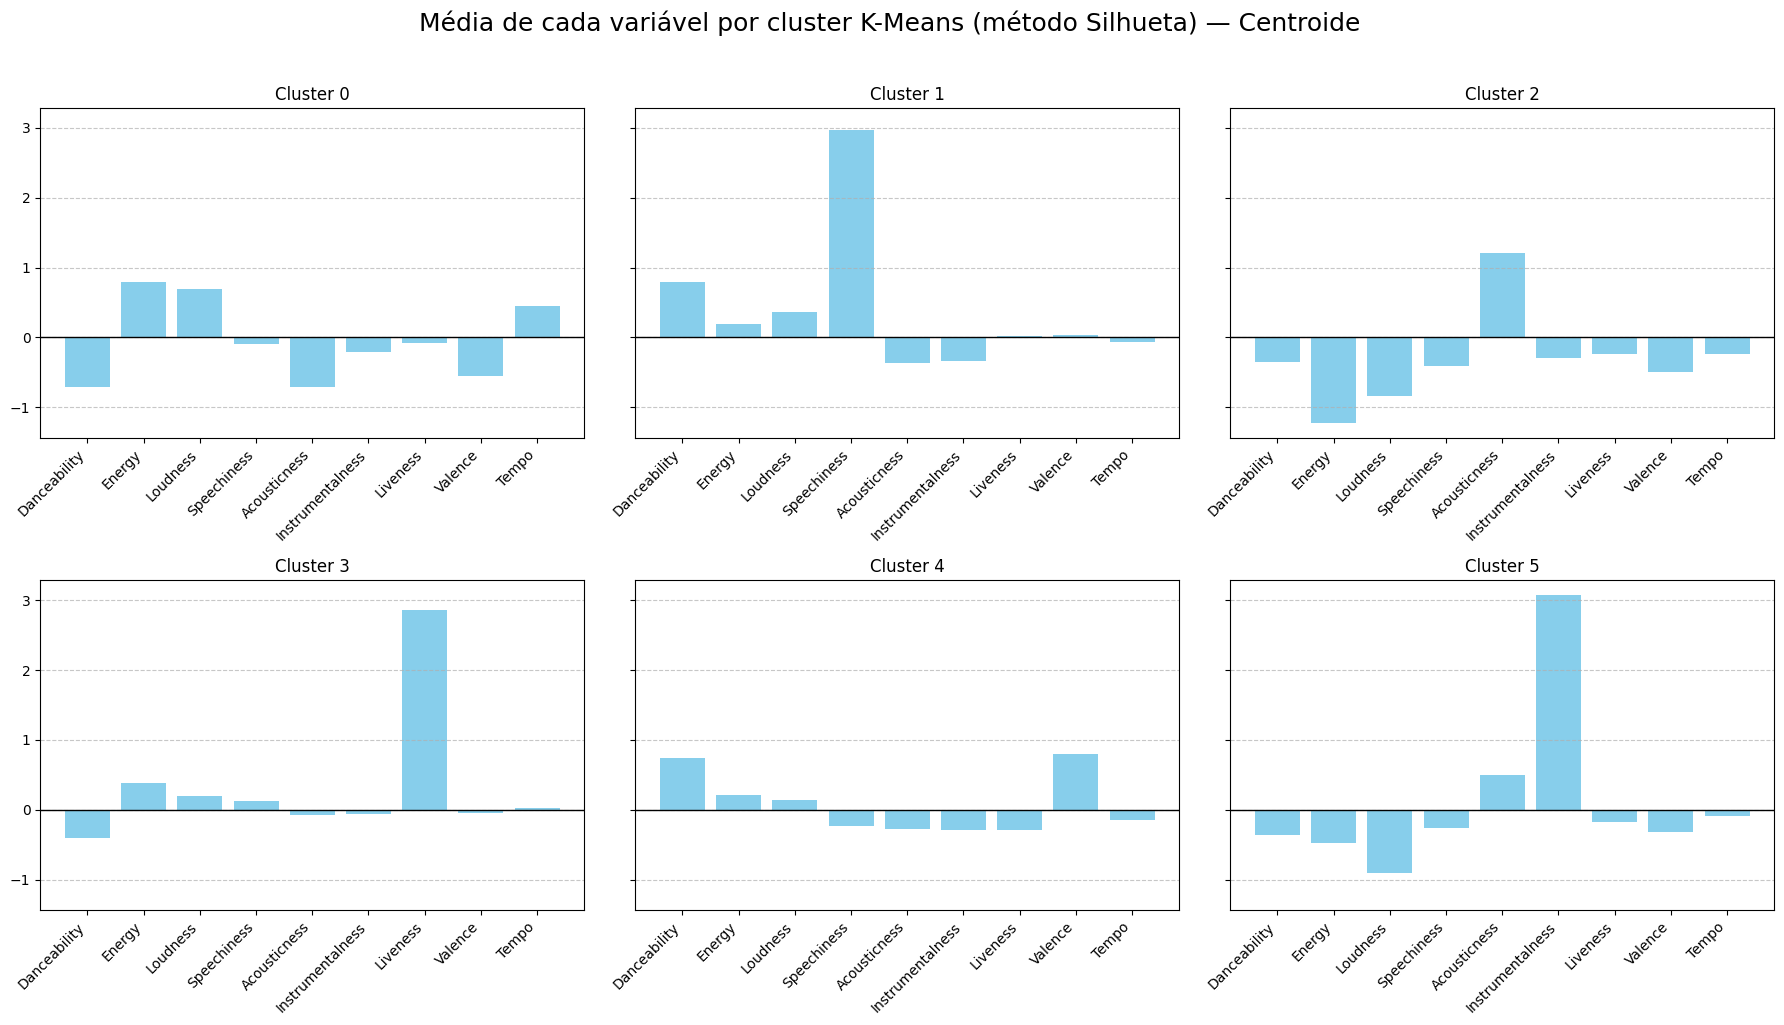

In [260]:
import matplotlib.pyplot as plt

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 10), sharey=True)

axes = axes.flatten()  # facilita o acesso como lista

for i, cluster in enumerate(sorted(df_com_clusters['cluster_kmeans_best_silhuette'].unique())):
    ax = axes[i]
    ax.bar(
        cluster_means__kmeans_best_silhuette.columns,
        cluster_means__kmeans_best_silhuette.loc[cluster],
        color='skyblue'
    )
    ax.set_title(f"Cluster {cluster}")
    ax.set_xticklabels(cluster_means__kmeans_best_silhuette.columns, rotation=45, ha='right')
    ax.axhline(0, color='black', linewidth=1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle(
    "Média de cada variável por cluster K-Means (método Silhueta) — Centroide",
    fontsize=18,
    y=1.02
)

fig.tight_layout()
plt.show()



Com base nesses resultados, já é possível obter algumas informações sobre esses clusters:

O Cluster 0 reúne músicas que apresentam alta energia e volume (Energy e Loudness), mas que ao mesmo tempo não são muito dançantes. Elas têm pouca acústica, sugerindo forte presença de produção eletrônica ou instrumental amplificado, e um clima emocional mais sério ou tenso, já que o valence está baixo. No geral, são faixas intensas, potentes, porém menos voltadas para pista de dança — mais “pesadas” do que festivas. A faixa encontrada que mais se aproxima do centroide é "Milk Train", de Jefferson Airplane.

O Cluster 1 é marcado de forma muito clara por uma concentração muito elevada de fala no áudio (speechiness muito acima da média), o que indica que são principalmente músicas de rap, hip hop ou spoken word. Essas faixas tendem a ser dançantes, com energia moderada e pouca acústica. No conjunto, representam músicas ritmadas, baseadas em batidas, com vocais falados predominantes. A faixa encontrada que mais se aproxima do centroide é "Workin Out", de JID.

O Cluster 2 agrupa músicas muito calmas e suaves, com energia e volume bem abaixo da média. Elas são fortemente acústicas, com instrumentos reais e pouca interferência eletrônica, além de apresentarem um tom emocional mais melancólico. São faixas intimistas, tranquilas e não voltadas para dança — típicas de estilos como folk, acústico, indie leve ou baladas mais sensíveis. A faixa encontrada que mais se aproxima do centroide é "Buzzin Fly", do Tim Buckley.

Cluster 3 é dominado por um valor excepcionalmente alto de liveness, característica que indica forte presença de ambiente ao vivo. Isso sugere que essas faixas provavelmente são gravações de shows, apresentações ao vivo ou sessões com público. Os demais atributos ficam próximos da média, com leve inclinação para energia moderada e pouca dança. Assim, o diferencial aqui não é o estilo musical, mas sim o contexto de gravação. A faixa encontrada que mais se aproxima do centroide é "1984: Back Down South - Live", de Luther Allison.

Cluster 4 concentra músicas bastante dançantes e com um clima emocional positivo, já que tanto a danceability quanto o valence estão claramente acima da média. Elas têm energia moderada, pouca acústica e características gerais de músicas pop ou eletrônicas alegres, com vibe festiva ou otimista. É o cluster mais alegre e vibrante, associado a faixas animadas e radiofônicas. A faixa encontrada que mais se aproxima do centroide é "Rock Me Gently", de Andy Kim.

Cluster 5 reúne músicas altamente instrumentais, com um nível extremamente elevado de instrumentalness — com foco predominante nos instrumentos e com pouco foco nos vocais. Elas também apresentam energia reduzida, volume baixo e um grau moderado de acústica. Em conjunto, representam faixas instrumentais, calmas e atmosféricas, como lo-fi, piano solo, ambient, trilhas sonoras minimalistas, ou rock progressivo experimental. A faixa encontrada que mais se aproxima do centroide é "Halo of Flies", de Alice Cooper.

##### 3.1.b) DBScan

A fim de encontrar o número adequado de clusters no caso do DBScan, é necessário primeiro determinar o eps (raio da vizinhança) e o min_samples (número mínimo de pontos da vizinhança) ideais. Para isso, vamos partir de algumas heurísticas:

- se número de dimensões é maior que 2, minSample poderia ser o dobro do número de dimensões (min_samples = 2*d)
- se eu tenho um número grande de dados (n > 1000) -> então minSamples poderia ser ln(n) (logaritmo natural/neperiano de n)
- uma boa ideia é testar valores entre 3 e 2*d
 
 No dataset em questão, como já visto acima, tem-se um total de 15149 dados. O logaritmo neperiano desse valor pode ser calculado da seguinte forma:

In [240]:
print(f'Quantidade de dados: {df_scaled.shape[0]}')
print(f'Logaritmo neperiano de {df_scaled.shape[0]} é aproximadamente: {int(np.log(df_scaled.shape[0]))}')

Quantidade de dados: 15149
Logaritmo neperiano de 15149 é aproximadamente: 9


Se analisarmos apenas pelo número de dimensões, então 2*d seria:

In [239]:
print(f'Número de dimensões: {df_scaled.shape[1]}')
print(f'Dobro do número de dimensões: {2 * df_scaled.shape[1]}')

Número de dimensões: 9
Dobro do número de dimensões: 18


Utilizando as heurísticas acima, portanto, uma boa ideia é testar valores de min_samples entre 3 e 18.

In [241]:
min_samples_range = range(3, 18, 1)

Para descobrir o valor de eps, todavia, sabe-se que existe uma interdependência entre eps e min_samples. Então a abordagem que faremos é a seguinte:

1 - com um eps fixo de 0.2, iteraremos no intervalo já definido de min_samples_range para encontrar o best_min_samples_inicial

2 - utilizando o best_min_samples_inicial como min_samples, utilizaremos o gráfico de distância dos k-vizinhos para encontrar o intervalo mais provável de eps (pelo ponto de inflexão no gráfico dos k-vizinhos), e chamaremos esse intervalo de eps_range

3 - iteraremos em min_samples_range e em eps_range em um grid para encontrar a melhor combinação entre ambos (a combinação que maximize o Índice de Silhueta)


In [ ]:
O valor 

#### Complemento - Visualização via t-SNE

A fim de permitir uma visualização interativa, apenas como complemento, vamos utilizar o t-SNE, uma técnica...

O resultado de forma interativa pode ser visualizado em: https://roriblim.github.io/PD-validacao-clusterizacao/src/tsne_clusters.html

In [232]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, perplexity=35, random_state=42)
tsne_emb = tsne.fit_transform(df_scaled)

df_plot = pd.DataFrame({
    "TSNE1": tsne_emb[:,0],
    "TSNE2": tsne_emb[:,1],
    "Cluster": labels_kmeans_best_silhuette,
    "Musica": df["Track"] + " - " + df["Artist"]
})

fig = px.scatter(
    df_plot,
    x="TSNE1",
    y="TSNE2",
    color="Cluster",
    hover_name="Musica",
    color_continuous_scale="Turbo",
    title="Músicas clusterizadas com K-Means - visualização interativa via t-SNE"
)

fig.update_layout(height=900, width=1200)
fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.show()

# Gerar HTML e adicionar rodapé com referências
html = fig.to_html(full_html=True, include_plotlyjs='cdn')

footer_html = """
<div style="font-size:14px; margin:20px 0 40px 0; padding-top:10px; border-top:1px solid #e1e1e1;">
  <strong>Fonte dos dados:</strong>
  <a href="https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023" target="_blank" rel="noopener">Kaggle — 10400 Classic Hits (10 genres)</a>
  <br>
  <strong>Projeto:</strong>
  <a href="https://github.com/roriblim/PD-validacao-clusterizacao" target="_blank" rel="noopener">GitHub — PD-validacao-clusterizacao</a>
</div>
"""

parts = html.rsplit("</body>", 1)
if len(parts) == 2:
    html_with_footer = parts[0] + footer_html + "</body>" + parts[1]
else:
    html_with_footer = html + footer_html

with open("tsne_clusters.html", "w", encoding="utf-8") as f:
    f.write(html_with_footer)
